In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.data.shape, mnist.target.shape
#(70000,784)

((70000, 784), (70000,))

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #정확도체크

In [3]:
#1. 데이터를 가져와서 형태파악, 피클로 저장

In [4]:
import pickle

In [5]:
with open('data.pickle', 'wb') as f:
    pickle.dump(mnist, f, pickle.HIGHEST_PROTOCOL)

In [6]:
with open('data.pickle', 'rb') as f:
    data = pickle.load(f)

In [7]:
data

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


In [8]:
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=156)

In [9]:
rf_clf = RandomForestClassifier(random_state=0)

In [10]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [11]:
pred = rf_clf.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test,pred)

In [13]:
accuracy

0.9689285714285715

In [35]:
x,y= data['data'], data['target']

In [41]:
from PIL import Image
import glob
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

<PIL.Image.Image image mode=L size=28x28 at 0x265264CB6C8>
['1']


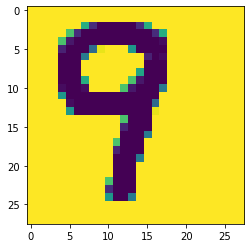

In [55]:
file_names =glob.glob("./9.png")

for image_path in file_names:
    img = Image.open(image_path).convert("L")
    plt.imshow(img)
    print(img)
    pix = np.array(img)
    pix = pix.reshape(1,784)
    pred = rf_clf.predict(255-pix)
    print(pred)